
# Clothing Classification

### Description

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:  
0 = T-shirt/top <br>
1 = Trouser <br>
2 = Pullover <br>
3 = Dress <br>
4 = Coat <br>
5 = Sandal <br>
6 = Shirt <br>
7 = Sneaker <br>
8 = Bag <br>
9 = Ankle boot <br>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

### Importing the dataset

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Let's create training and testing dataframes using CSV files

training_df = pd.read_csv('train_data.csv')
testing_df = pd.read_csv('test_data.csv')

### Visualizing the data

In [4]:
# Let's check first 5 rows of training dataframe

training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's check last 5 rows of training dataframe

training_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. First column (i.e. label) is the column to be predicted. We will ignore the same initially.
3. There are 60000 observations in training dataset
4. All pixel values are between 0 to 255

In [6]:
# Let's check first 5 rows of testing dataframe

testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let's check last 5 rows of testing dataframe

testing_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. There are 10000 observations in testing dataset
3. All pixel values are between 0 to 255

In [8]:
# Let's create numpy arrays for training and testing dataframes
# using float values for further processing

trainData = np.array(training_df, dtype='float32')
testData = np.array(testing_df, dtype='float32')

In [9]:
# Let's check the training data and it's shape

print(trainData)
print('\n')
print(trainData.shape)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


(60000, 785)


In [10]:
# Let's check the testing data

print(testData)
print('\n')
print(testData.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(10000, 785)


3.0


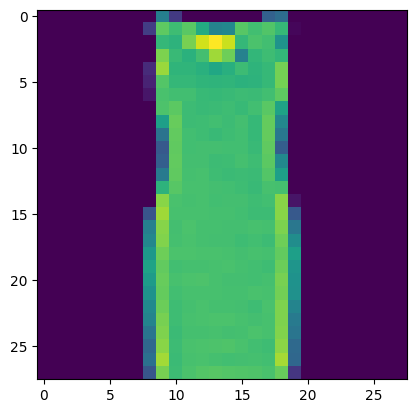

In [11]:
# Let's visualize an image randomly using any random number from training data

# Importing library random to get any random number

import random
i = random.randint(1, trainData.shape[0])

# Displaying a random image using pixel values(reshaped)

plt.imshow(trainData[i, 1:].reshape(28, 28))
print(trainData[i, 0])

# Let's check all class values with labels for reference

# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

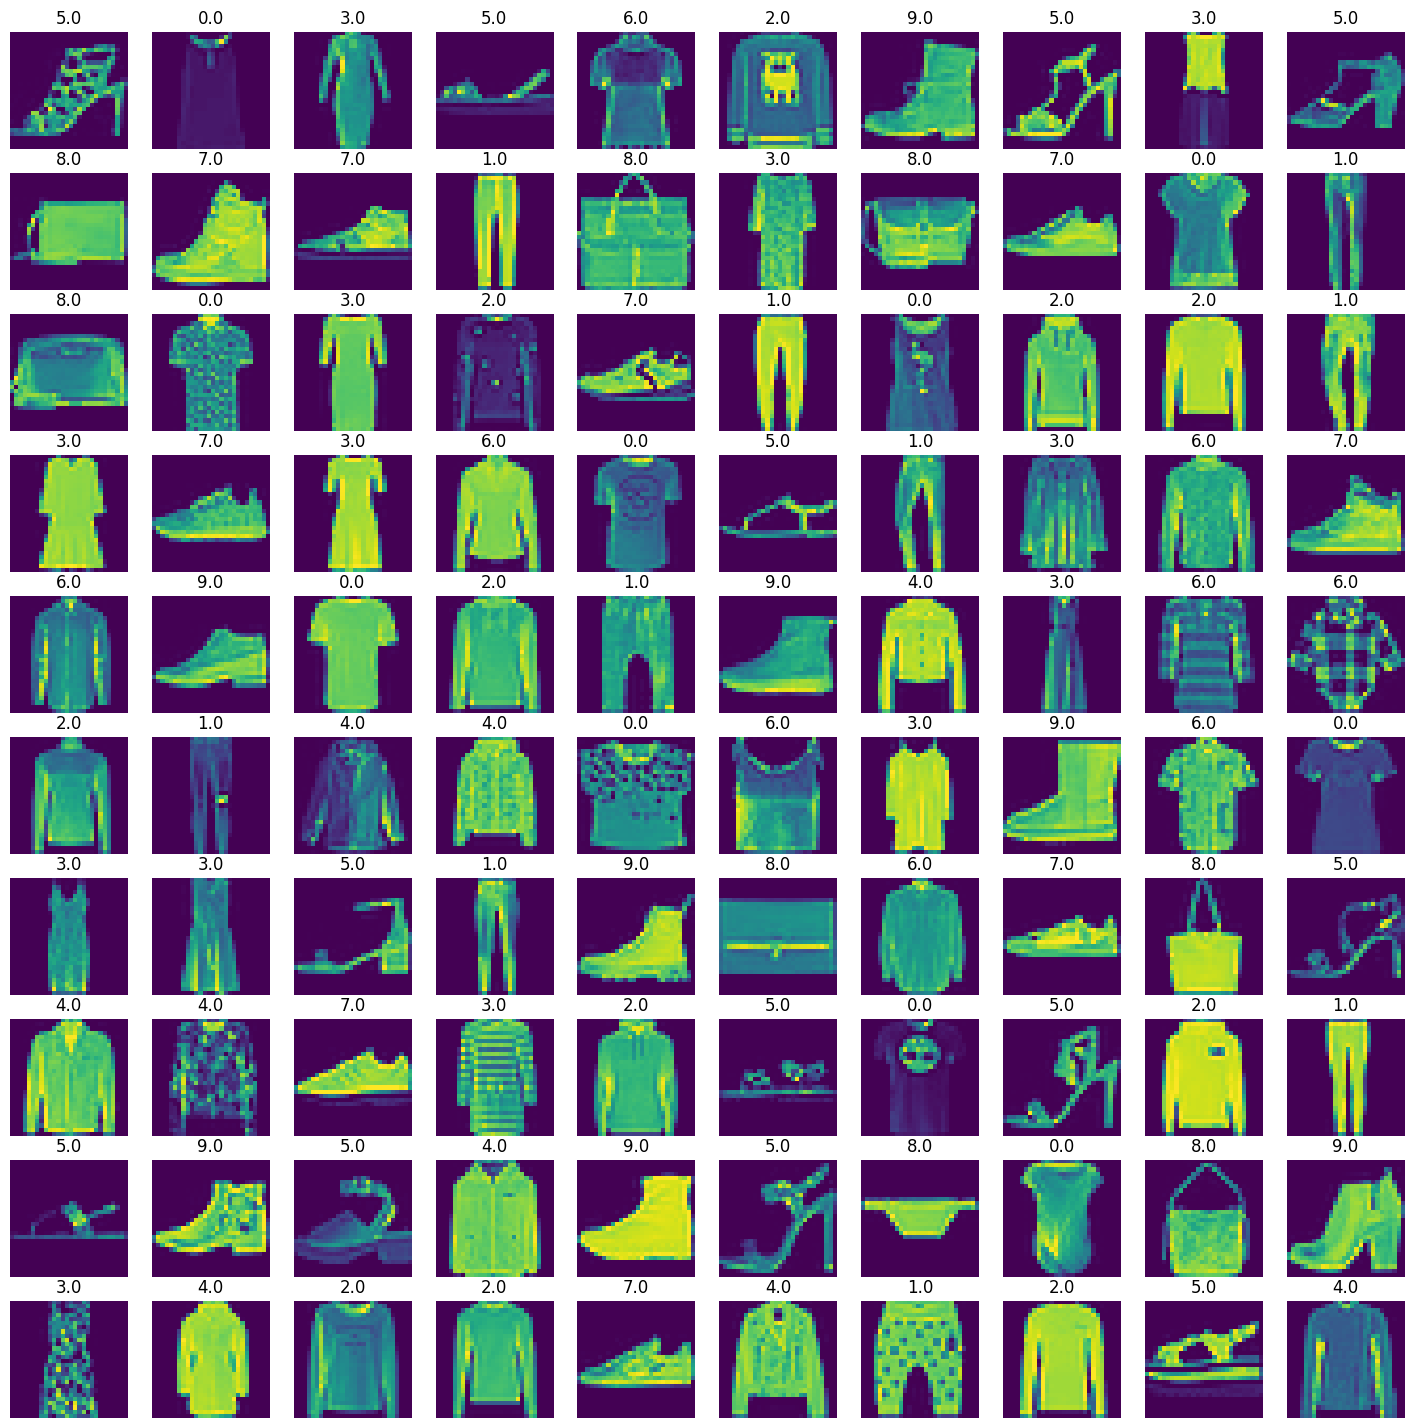

In [12]:
# Let's view multiple images in a grid format

Grid_W = 10 # Number of columns
Grid_H = 10 # Number of rows

# Let's create subplot to display multiple images

fig, axes = plt.subplots(nrows=Grid_H, ncols=Grid_W, figsize = (18,18))
axes = axes.ravel()

# Let's loop through the training dataset to display random 100 images

for i in np.arange(0, Grid_W*Grid_H):
    index = np.random.randint(0, len(trainData))
    axes[i].imshow(trainData[index, 1:].reshape(28, 28))
    axes[i].set_title(trainData[index, 0])
    axes[i].axis('off')

### Splitting and reshaping the data

In [13]:
# Let's split the data into initial X_train and y_train data
# Normalizing each pixel value by dividing the same with 255
# i.e. Converting all pixel values between range 0 to 1

X_train_init = trainData[:, 1:] / 255
y_train_init = trainData[:, 0]

# Let's do the same for test data

X_test = testData[:, 1:] / 255
y_test = testData[:, 0]

In [14]:
# Let's split the training data further to create training and validation data

# Importing necessary library

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_init, y_train_init,
                                                      test_size=0.2, random_state = 0)

In [15]:
X_train.shape

(48000, 784)

In [16]:
X_valid.shape

(12000, 784)

In [17]:
# Let's reshape the array similar to an image data e.g. (row, column, channel)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [18]:
# Let's check the new shape of the training, testing and validation data

X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_valid.shape

(12000, 28, 28, 1)

### Training a Neural Network Model

In [21]:
import tensorflow as tf

### First model

In [22]:
##########################
# design your first model
##########################

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',data_format='channels_last',name='conv_1', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_3', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_3'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_4', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_4'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, name='fc_2',activation='softmax'))
model.build(input_shape=(None, 28, 28, 1))

In [23]:
model.compute_output_shape(input_shape=(10000, 28, 28, 1))

TensorShape([10000, 10])

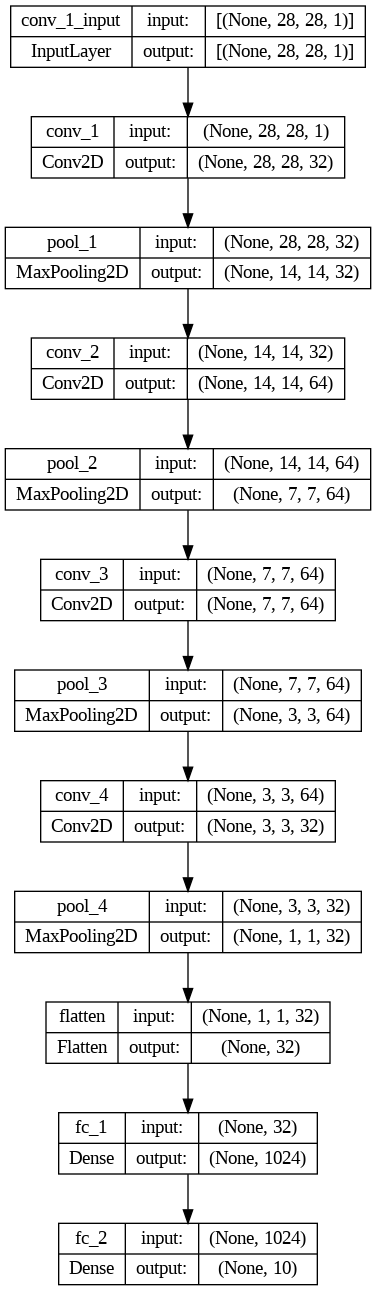

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [25]:
#############################
# compile your first model
############################
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy'])


In [26]:
###########################
# get summary of your model
###########################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 64)          102464    
                                                                 
 pool_3 (MaxPooling2D)       (None, 3, 3, 64)          0         
                                                                 
 conv_4 (Conv2D)             (None, 3, 3, 32)          5

In [27]:
#######################
# fit your first model
#######################
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), shuffle=True)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 173s 114ms/step - loss: 0.5109 - accuracy: 0.8086 - val_loss: 0.3320 - val_accuracy: 0.8799
Epoch 2/3
1500/1500 [==============================] - 170s 113ms/step - loss: 0.3073 - accuracy: 0.8873 - val_loss: 0.2748 - val_accuracy: 0.8993
Epoch 3/3
1500/1500 [==============================] - 168s 112ms/step - loss: 0.2586 - accuracy: 0.9038 - val_loss: 0.2840 - val_accuracy: 0.8963


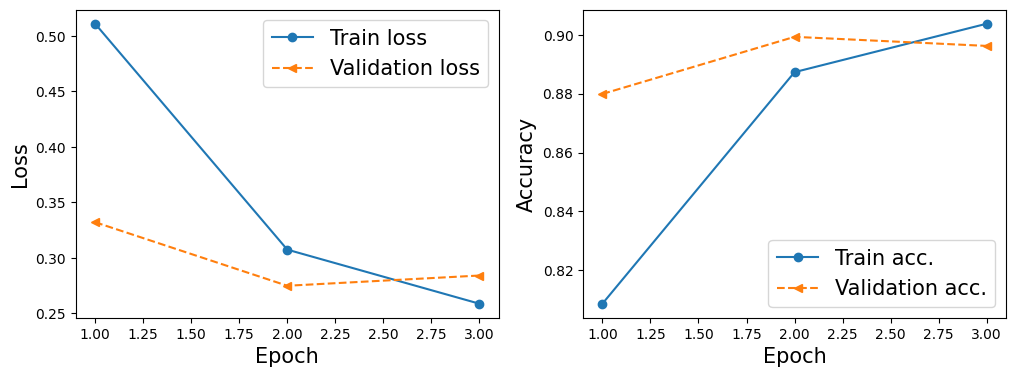

In [28]:
###########################################################################################
# evaluate your first model and and plot your training curve and show classification report
###########################################################################################
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [29]:
test_results = model.evaluate(X_test , y_test)
print(f"Test Accuracy is {test_results[1]*100}")

313/313 [==============================] - 10s 30ms/step - loss: 0.2686 - accuracy: 0.8985
Test Accuracy is 89.85000252723694


### Second model

In [30]:
##########################
# design your second model
##########################

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',data_format='channels_last',name='conv_1', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_2', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pool_2'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_3', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pool_3'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_4', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pool_4'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, name='fc_2',activation='softmax'))
model.build(input_shape=(None, 28, 28, 1))

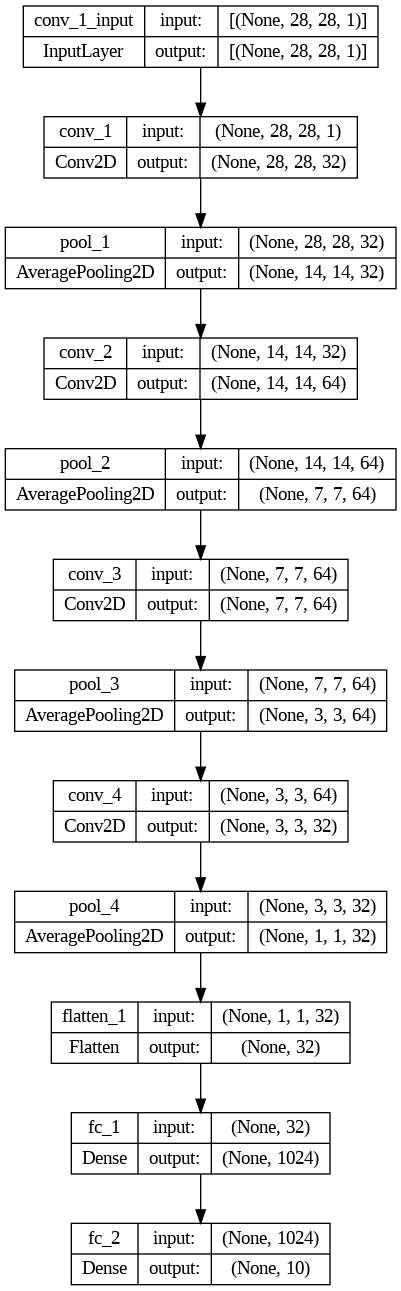

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:
#############################
# compile your first model
############################
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy'])


In [33]:
###########################
# get summary of your model
###########################
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (AveragePooling2D)   (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (AveragePooling2D)   (None, 7, 7, 64)          0         
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 64)          102464    
                                                                 
 pool_3 (AveragePooling2D)   (None, 3, 3, 64)          0         
                                                                 
 conv_4 (Conv2D)             (None, 3, 3, 32)         

In [34]:
#######################
# fit your second model
#######################
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), shuffle=True)

Epoch 1/3
1500/1500 [==============================] - 171s 113ms/step - loss: 0.6654 - accuracy: 0.7458 - val_loss: 0.4917 - val_accuracy: 0.8153
Epoch 2/3
1500/1500 [==============================] - 159s 106ms/step - loss: 0.3990 - accuracy: 0.8522 - val_loss: 0.3612 - val_accuracy: 0.8673
Epoch 3/3
1500/1500 [==============================] - 158s 105ms/step - loss: 0.3307 - accuracy: 0.8756 - val_loss: 0.2996 - val_accuracy: 0.8885


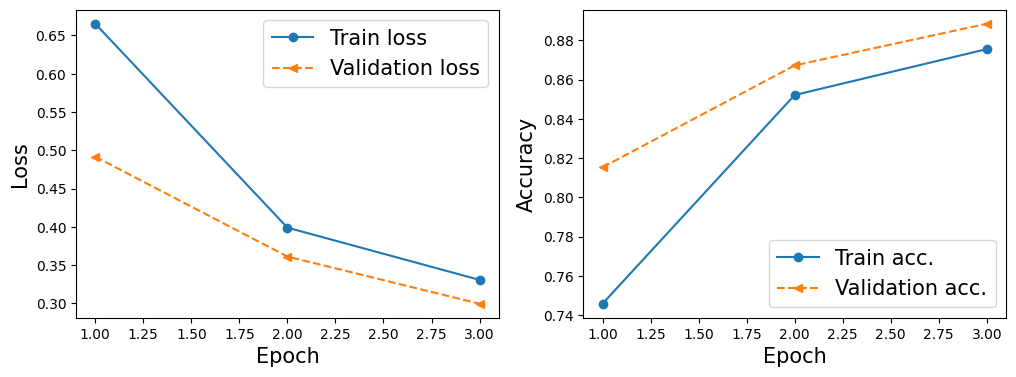

In [35]:
###########################################################################################
# evaluate your second model and and plot your training curve and show classification report
###########################################################################################
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()

In [36]:
test_results = model.evaluate(X_test , y_test)
print(f"Test Accuracy is {test_results[1]*100}")

313/313 [==============================] - 10s 30ms/step - loss: 0.2868 - accuracy: 0.8899
Test Accuracy is 88.99000287055969


### Third model

In [37]:
##########################
# design your third model
##########################
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',data_format='channels_last',name='conv_1', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_3', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_3'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),strides=(1, 1), padding='same',name='conv_4', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_4'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5))
model.add(tf.keras.layers.Dense(units=10, name='fc_2',activation='softmax'))
model.build(input_shape=(None, 28, 28, 1))

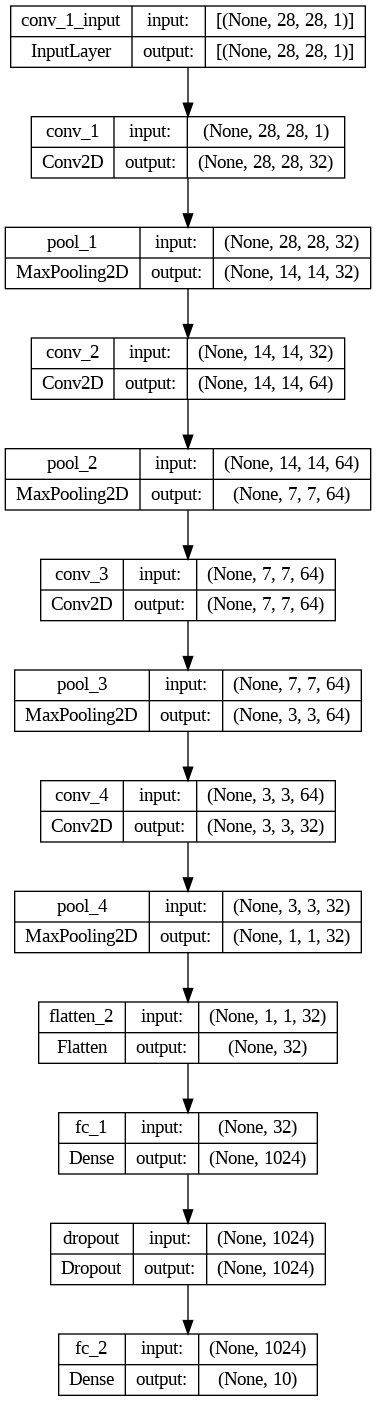

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [39]:
#############################
# compile your first model
############################
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy'])


In [40]:
###########################
# get summary of your model
###########################
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 64)          102464    
                                                                 
 pool_3 (MaxPooling2D)       (None, 3, 3, 64)          0         
                                                                 
 conv_4 (Conv2D)             (None, 3, 3, 32)         

In [41]:
#######################
# fit your third model
#######################
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), shuffle=True)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 170s 113ms/step - loss: 0.5178 - accuracy: 0.8063 - val_loss: 0.3708 - val_accuracy: 0.8738
Epoch 2/3
1500/1500 [==============================] - 167s 111ms/step - loss: 0.3118 - accuracy: 0.8857 - val_loss: 0.2780 - val_accuracy: 0.8996
Epoch 3/3
1500/1500 [==============================] - 177s 118ms/step - loss: 0.2636 - accuracy: 0.9037 - val_loss: 0.2836 - val_accuracy: 0.8957


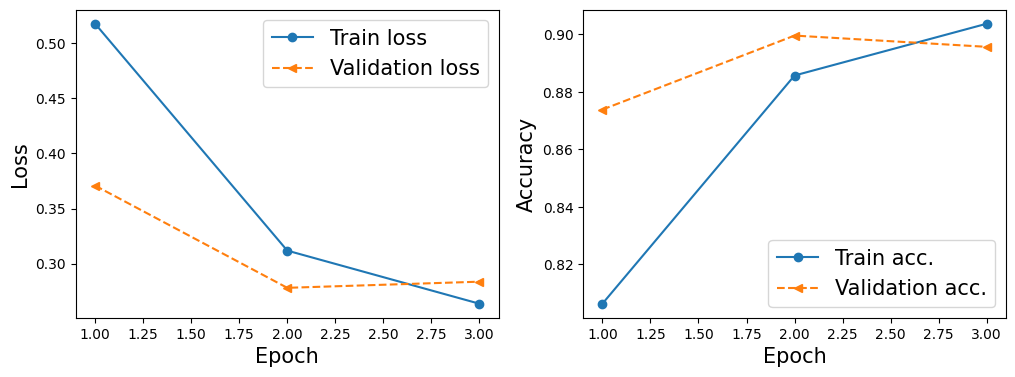

In [42]:
###########################################################################################
# evaluate your third model and and plot your training curve and show classification report
###########################################################################################
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()

In [43]:
test_results = model.evaluate(X_test , y_test)
print(f"Test Accuracy is {test_results[1]*100}")

313/313 [==============================] - 8s 26ms/step - loss: 0.2779 - accuracy: 0.8973
Test Accuracy is 89.73000049591064
